# Численные методы. Лабораторная №3.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from numpy import sin, cos, exp

# Задание 1.

In [336]:
def f2(t, u):
    return np.array([-50*(u[0]-cos(t))+10*u[1], 1.2*u[0]-u[1]*u[0]])
u_0 = np.array([1,1])
tau1 = 1/8
tau2 = 1/128
A = np.array([[0, 0], [1/2, 0]])
a = np.array([0, 1/2])
b = np.array([0, 1])
t1 = np.arange(0, 0.76, tau1)
t2 = np.arange(0, 0.75+1/128, tau2)
u1 = np.zeros((2, len(t1)))
u2 = np.zeros((2, len(t2)))
u1[:, 0] = u_0
u2[:, 0] = u_0
u1

array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.]])

In [125]:
for i in range(len(t1)-1):
    w1 = f2(t1[i], u1[:,i])
    w2 = f2(t1[i], u1[:,i] + tau1*a[1]*w1)
    u1[:,i+1] = u1[:, i] + tau1*(b[0]*w1 + b[1]*w2)

Text(0.5, 1.0, 'tau = 1/8: 1 координата')

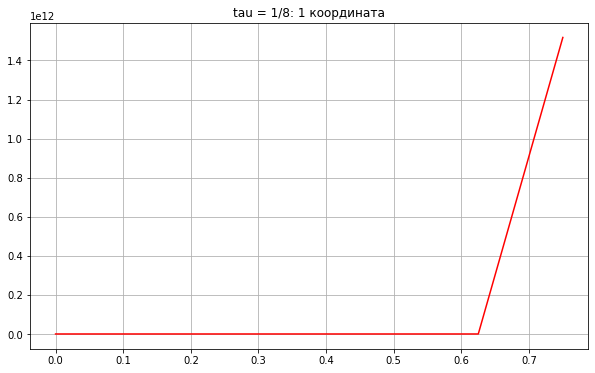

In [192]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(';')
ax.plot(t1, u1[0], 'r', )
ax.set_title('tau = 1/8: 1 координата')

Text(0.5, 1.0, 'tau = 1/8: 2 координата')

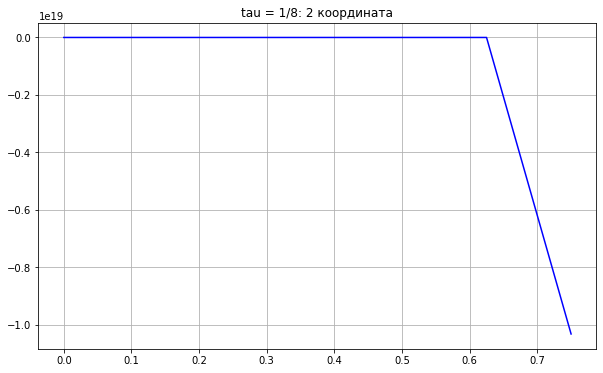

In [194]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(';')
ax.plot(t1, u1[1], 'b', )
ax.set_title('tau = 1/8: 2 координата')

In [337]:
for i in range(len(t2)-1):
    w1 = f2(t2[i], u2[:,i])
    w2 = f2(t2[i], u2[:,i] + tau2*a[1]*w1)
    u2[:,i+1] = u2[:, i] + tau2*(b[0]*w1 + b[1]*w2)

Text(0.5, 1.0, 'tau = 1/128')

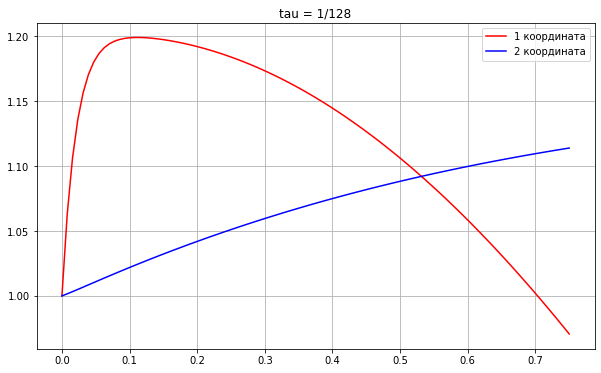

In [338]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(';')
ax.plot(t2, u2[0], 'r',label= '1 координата' )
ax.plot(t2, u2[1], 'b', label = '2 координата')
ax.legend()
ax.set_title('tau = 1/128')

# Задание 2.

In [313]:
A = np.array([[0, 0], [1/2, 0]])
a = np.array([0, 1/2])
b = np.array([0, 1])
u_0 = np.array([1,1])
t = np.arange(0, 0.76, tau)
u = np.zeros((2, len(t)))
u[:, 0] = u_0
def f2(t, u):
    return np.array([-50*(u[0]-cos(t))+10*u[1], 1.2*u[0]-u[1]*u[0]])

def rosenbrock(tau,t, alpha, A, a, b):
    u = np.zeros((2, len(t)))
    u_0 = np.array([1,1])
    u[:, 0] = u_0
    u1 = u[0]
    u2 = u[1]
    E = np.eye(2)
    #w = []
    delta_u = 10**(-5)
    for i in range(len(t)-1):
        dfu1 = (f2(t[i], np.array([u1[i]+delta_u*u1[i], u2[i]])) - f2(t[i], np.array([u1[i]-delta_u*u1[i], u2[i]])))/2/delta_u
        dfu2 = (f2(t[i], np.array([u1[i], u2[i]+delta_u*u2[i]])) - f2(t[i], np.array([u1[i], u2[i]-delta_u*u2[i]])))/2/delta_u
        top = np.array([dfu1[0], dfu2[0]])
        bot = np.array([dfu1[1], dfu2[1]])
        f_u = np.array([top, bot])
        #print(f_u)
        left = E - alpha*tau*f_u
        right = f2(t[i]+tau/2, u[:, i])
       # w.append(np.linalg.solve(left, right))
        w = np.linalg.solve(left, right)
        if type(w== complex):
            w = w.real()
        u[:, i+1] = u[:, i] +w*tau
        u1 = u[0]
        u2 = u[1]
    return u

In [328]:
alpha = 1/2
res1 = rosenbrock(tau,t, alpha, A, a, b)
alpha = 1
res2 = rosenbrock(tau,t, alpha, A, a, b)
alpha = complex(1/2,1/2)
res3 = rosenbrock(tau,t, alpha, A, a, b)

C:\Users\acer\AppData\Local\Temp/ipykernel_4732/332739392.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
  u[:, i+1] = u[:, i] +w*tau


Text(0.5, 1.0, 'Графики')

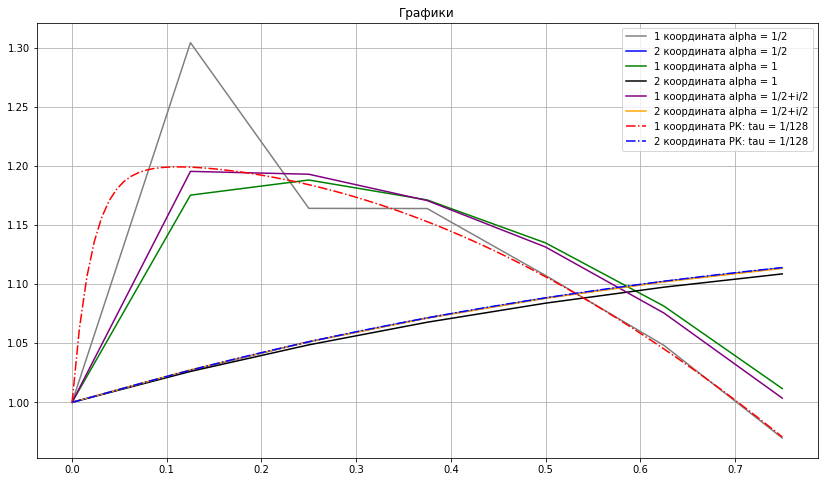

In [365]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.grid(';')
ax.plot(t, res1[0], 'grey',label= '1 координата alpha = 1/2' )
ax.plot(t, res1[1], 'b', label = '2 координата alpha = 1/2')
ax.plot(t, res2[0], 'g',label= '1 координата alpha = 1' )
ax.plot(t, res2[1], 'black', label = '2 координата alpha = 1')
ax.plot(t, res3[0], 'purple',label= '1 координата alpha = 1/2+i/2' )
ax.plot(t, res3[1], 'orange', label = '2 координата alpha = 1/2+i/2')
ax.plot(t2, u2[0], 'r-.',label= '1 координата РК: tau = 1/128' )
ax.plot(t2, u2[1], 'b-.', label = '2 координата РК: tau = 1/128')
ax.legend()
ax.set_title('Графики')